In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
import scipy.stats as stats  
import statsmodels.api as sm


## Generate Synthetic Data for Regression

In [18]:
# Set random seed for reproducibility
np.random.seed(42)
N = 50000
c = 3

# Generate synthetic dataset
X = 2 * np.random.rand(N, c)  # Three independent variables
coeffs = np.array([-3, 2.5, -2])  # True coefficients for multiple regression
y = X.dot(coeffs) + np.random.randn(N) * 2  # Adding Gaussian noise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Initialize models
lr_simple = LinearRegression()
lr_multi = LinearRegression()
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.5)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
dt_model = DecisionTreeRegressor(random_state=42)
svm_model = SVR()


In [20]:
# Train models
lr_simple.fit(X_train[:, [0]], y_train)
lr_multi.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVR()

In [21]:
# Make predictions
y_pred_simple = lr_simple.predict(X_test[:, [0]])
y_pred_multi = lr_multi.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)


In [22]:
# Model evaluation function
def evaluate_model(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.4f}")
    print(f"R-squared: {r2:.4f}\n")


In [23]:
# Evaluate models
evaluate_model("Simple Linear Regression", y_test, y_pred_simple)
evaluate_model("Multiple Linear Regression", y_test, y_pred_multi)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Decision Tree", y_test, y_pred_dt)
evaluate_model("Support Vector Machine (SVM)", y_test, y_pred_svm)


Simple Linear Regression Performance:
MSE: 7.4152
R-squared: 0.2926

Multiple Linear Regression Performance:
MSE: 3.8784
R-squared: 0.6300

Ridge Regression Performance:
MSE: 3.8784
R-squared: 0.6300

Lasso Regression Performance:
MSE: 6.1411
R-squared: 0.4141

Random Forest Performance:
MSE: 4.3340
R-squared: 0.5865

Decision Tree Performance:
MSE: 8.0802
R-squared: 0.2292

Support Vector Machine (SVM) Performance:
MSE: 3.8807
R-squared: 0.6298



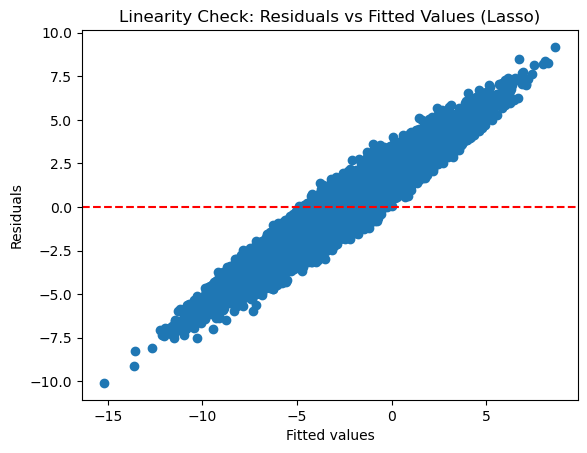

In [24]:
# Residual Analysis
plt.scatter(y_test, y_test - y_pred_lasso)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Fitted Values (Lasso)")
plt.show()


In [25]:
# Normality of Residuals (Shapiro-Wilk Test)
y_train_pred = lasso.predict(X_train)
residuals = y_train - y_train_pred
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality: p-value = {shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test for Normality: p-value = 0.3021


c:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40000.
  res = hypotest_fun_out(*samples, **kwds)


In [26]:
# Multicollinearity Check (Variance Inflation Factor - VIF)
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + [f"X{i+1}" for i in range(X_train.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_train_const, i) for i in range(X_train_const.shape[1])]
print("\nVariance Inflation Factor (VIF) for Multicollinearity:")
print(vif_data)



Variance Inflation Factor (VIF) for Multicollinearity:
  Feature        VIF
0   const  10.033986
1      X1   1.000092
2      X2   1.000039
3      X3   1.000068


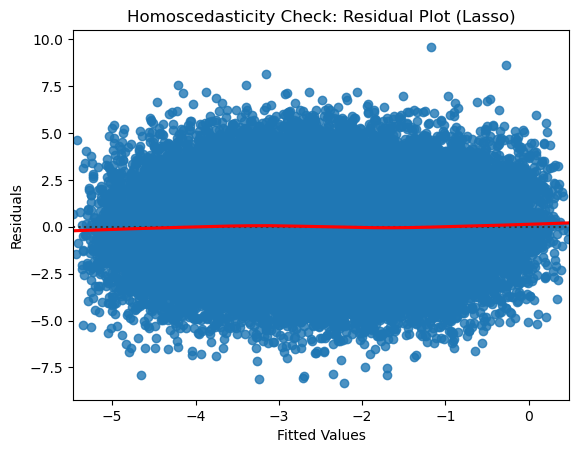

In [27]:
# Homoscedasticity Check
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residual Plot (Lasso)")
plt.show()


## Checking for Assumptions for Lasso Regression

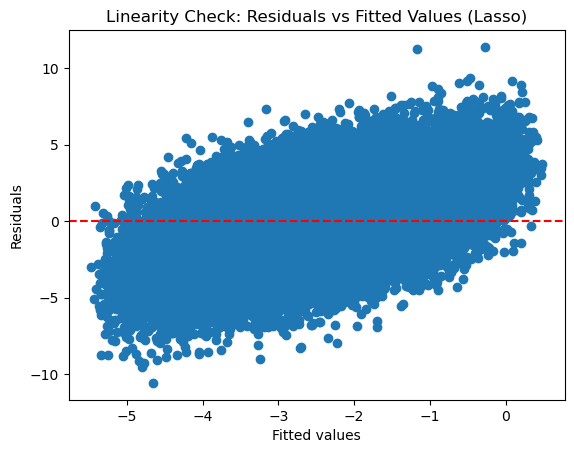

In [28]:
# 1. Linearity Check (Plot Residuals vs Fitted Values)
y_train_pred = lasso.predict(X_train)
residuals = y_train - y_train_pred
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity Check: Residuals vs Fitted Values (Lasso)")
plt.show()

In [29]:
# 2. Normality of Residuals (Shapiro-Wilk Test)
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk Test for Normality: p-value = {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test for Normality: p-value = 0.3021


c:\Users\hp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40000.
  res = hypotest_fun_out(*samples, **kwds)


In [30]:
# 3. Multicollinearity Check (Variance Inflation Factor - VIF)
X_train_const = sm.add_constant(X_train)
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + [f"X{i+1}" for i in range(X_train.shape[1])]
vif_data["VIF"] = [variance_inflation_factor(X_train_const, i) for i in range(X_train_const.shape[1])]
print("\nVariance Inflation Factor (VIF) for Multicollinearity:")
print(vif_data)


Variance Inflation Factor (VIF) for Multicollinearity:
  Feature        VIF
0   const  10.033986
1      X1   1.000092
2      X2   1.000039
3      X3   1.000068


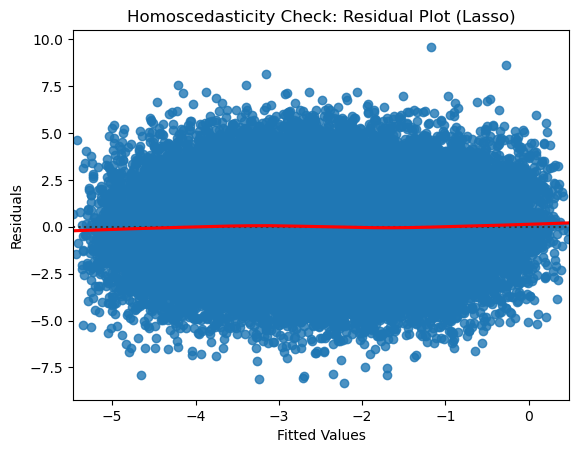

In [31]:
# 4. Homoscedasticity Check (Plot Residuals)
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={"color": "red"})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check: Residual Plot (Lasso)")
plt.show()


Is The Shapiro Test Normal

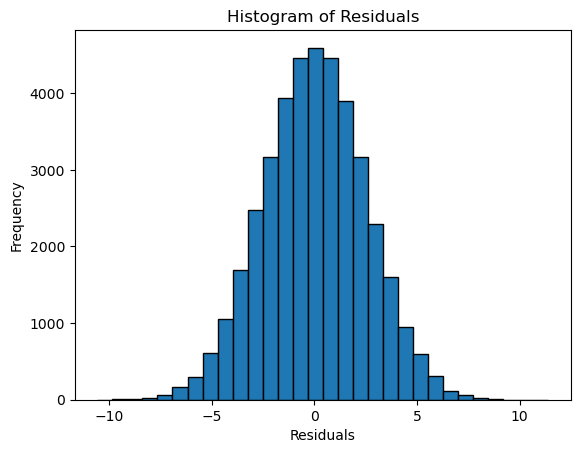

NameError: name 'stats' is not defined

In [ ]:
import scipy.stats as stats  
# Histogram  
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Q-Q Plot  
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()